In [1]:
using Plots

In [2]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1242


In [136]:
function x_dot(x_1::Float64, x_2::Float64)
    return (x_2 , 1 - x_1^2)
end

x_dot (generic function with 2 methods)

In [183]:
function hamiltonian(x_1::Float64, x_2::Float64)
    return (x_1 + (x_2^2)/2 - (x_1^3)/3)
end

hamiltonian (generic function with 2 methods)

In [275]:
function x_dot_ode(dx, x, p, t)
    dx[1] = x[2]
    dx[2] = 1 - x[1]^2
end

x_dot_ode (generic function with 1 method)

In [276]:
gr(size=(800,600))


Plots.GRBackend()

In [359]:
function vector_field()

  s = 2.0
  X = range(-s, stop=s, length=500)
  Y = range(-s, stop=s, length=500)
    
  fig = contour(X, Y, hamiltonian)
  
  scaled_der(x, y) = (der / 3 for der in x_dot(x, y))
  x = range(-s + 0.1, stop=s - 0.1, length=5)
  y = range(-s + 0.1, stop=s -0.1, length=5)
  quiver!(y, x', quiver=scaled_der, c=:blue)
    
  xlims!(-s, s)
  ylims!(-s, s)
  png(fig, "vector_space.png")
    
  return fig
end

vector_field (generic function with 1 method)

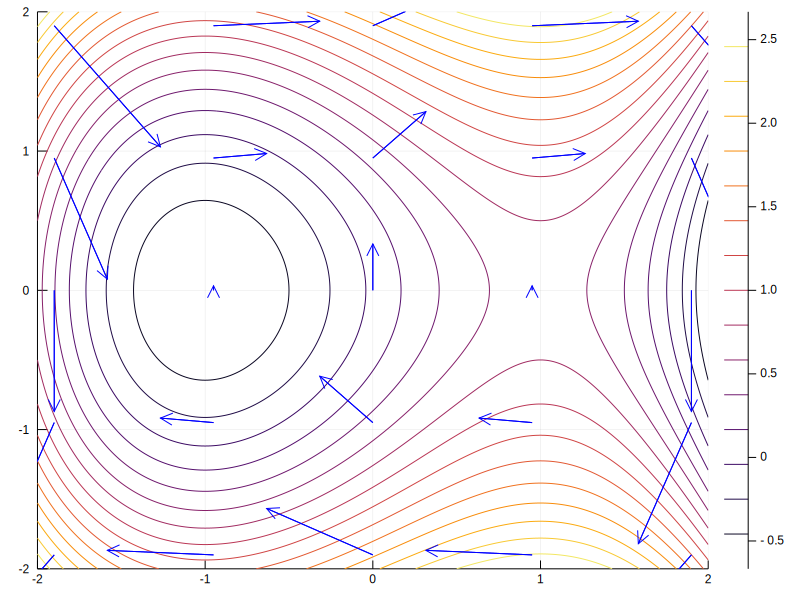

In [360]:
vector_field()

In [357]:
function plot_point(s, e, n = 30)
    points = range(s, stop=e, length=n)
    fig = plot(reuse = false, legend=false)
    for x_1 in points
        x0 = [x_1, 0.0]
        tspan = (0.0, 10.0)
        prob =  ODEProblem(x_dot_ode, x0, tspan)
        sol = solve(prob)
        plot!(sol, vars=(0, 1), color = :blue)
    end
    png(fig, "manifolds.png")
    return fig
end

plot_point (generic function with 3 methods)

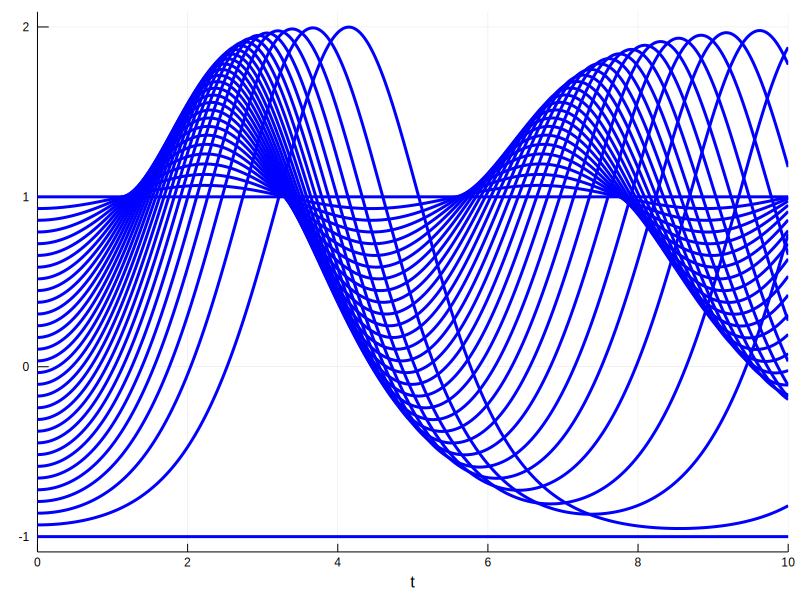

In [358]:
plot_point(-1.0, 1.0)